<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

In [1]:
!pip install plotly==4.9.0
!pip install jupyterlab “ipywidgets>=7.5”
!jupyter labextension install jupyterlab-plotly@4.9.0
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.9.0

  Using cached plotly-4.9.0-py2.py3-none-any.whl (12.9 MB)
Processing /home/jovyan/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56/retrying-1.3.3-py3-none-any.whl
ERROR: Invalid requirement: '“ipywidgets'
Building jupyterlab assets (build:prod:minimize)
Building jupyterlab assets (build:prod:minimize)


In [ ]:
!jupyter lab build

[LabBuildApp] JupyterLab 2.2.8
[LabBuildApp] Building in /opt/conda/share/jupyter/lab
[LabBuildApp] Building jupyterlab assets (build:prod:minimize)
|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


# EDA

In [4]:
df.shape

(150, 8)

In [5]:
df_desc = df.describe(include='all')
df_desc

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07-01-2011,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [6]:
df.isnull().sum()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

In [7]:
#taux de valeurs manquantes par colonne
print("Pourcentage de valeurs manquantes: ")
display(100*df.isnull().sum()/df.shape[0])

Pourcentage de valeurs manquantes: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [8]:
#suppression des valeurs manquantes de la colonne cible pour éviter de biaiser dans les prédictions 
df.dropna(subset=['Weekly_Sales'], inplace=True)

In [9]:
# Convert date to datetime format and show dataset information
df['Date'] =  pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         136 non-null    float64       
 1   Date          118 non-null    datetime64[ns]
 2   Weekly_Sales  136 non-null    float64       
 3   Holiday_Flag  125 non-null    float64       
 4   Temperature   121 non-null    float64       
 5   Fuel_Price    124 non-null    float64       
 6   CPI           125 non-null    float64       
 7   Unemployment  122 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 9.6 KB


In [10]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896
...,...,...,...,...,...,...,...,...
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaT,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN


In [11]:
df.isnull().sum()

Store            0
Date            18
Weekly_Sales     0
Holiday_Flag    11
Temperature     15
Fuel_Price      12
CPI             11
Unemployment    14
dtype: int64

In [12]:
#suppression des valeurs manquantes de la colonne Date et Holiday_Flag
df.dropna(subset=['Date'], inplace=True)
df.dropna(subset=['Holiday_Flag'], inplace=True)

In [13]:
df.isnull().sum()

Store            0
Date             0
Weekly_Sales     0
Holiday_Flag     0
Temperature     11
Fuel_Price      11
CPI              9
Unemployment    11
dtype: int64

In [14]:
# remplacer les valeurs manquantes dans les autres col en utilisant la moyenne dataframe.fillna()
df = df.fillna(df.mean())

<ipython-input-14-94232a1361b3>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())


In [15]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [16]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,13.0,2011-03-25,1807545.43,0.0,42.380000,3.435,128.616064,7.47000
4,6.0,2010-05-28,1644470.66,0.0,78.890000,2.759,212.412888,7.09200
5,4.0,2010-05-28,1857533.70,0.0,59.645918,2.756,126.160226,7.89600
6,15.0,2011-03-06,695396.19,0.0,69.800000,4.069,134.855161,7.65800
7,20.0,2012-03-02,2203523.20,0.0,39.930000,3.617,213.023623,6.96100
...,...,...,...,...,...,...,...,...
144,3.0,2012-10-19,424513.08,0.0,73.440000,3.594,226.968844,6.03400
145,14.0,2010-06-18,2248645.59,0.0,72.620000,2.780,182.442420,8.89900
147,17.0,2010-11-06,845252.21,0.0,57.140000,2.841,126.111903,7.71999
148,8.0,2011-12-08,856796.10,0.0,86.050000,3.638,219.007525,7.71999


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

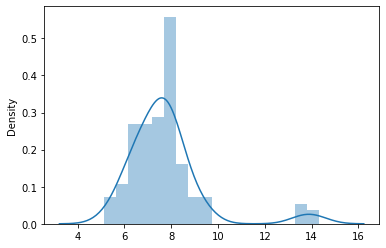

In [17]:
#vérification de biais
sns.distplot(df['Unemployment'].values, kde=True)

In [18]:
vmin = 4
vmax = 10

df = df[df['Unemployment'].between(vmin, vmax)]

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

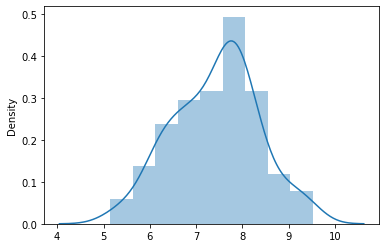

In [19]:
sns.distplot(df['Unemployment'].values, kde=True)

In [20]:
df.shape

(104, 8)

In [21]:
# Fractionnement de la date et création de nouvelles colonnes (Day, Month, and Year)
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

<ipython-input-21-98464f76867a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Day"]= pd.DatetimeIndex(df['Date']).day
<ipython-input-21-98464f76867a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.DatetimeIndex(df['Date']).month
<ipython-input-21-98464f76867a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,13.0,2011-03-25,1807545.43,0.0,42.380000,3.435,128.616064,7.47000,25,3,2011
4,6.0,2010-05-28,1644470.66,0.0,78.890000,2.759,212.412888,7.09200,28,5,2010
5,4.0,2010-05-28,1857533.70,0.0,59.645918,2.756,126.160226,7.89600,28,5,2010
6,15.0,2011-03-06,695396.19,0.0,69.800000,4.069,134.855161,7.65800,6,3,2011
7,20.0,2012-03-02,2203523.20,0.0,39.930000,3.617,213.023623,6.96100,2,3,2012
...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,2012-10-19,424513.08,0.0,73.440000,3.594,226.968844,6.03400,19,10,2012
145,14.0,2010-06-18,2248645.59,0.0,72.620000,2.780,182.442420,8.89900,18,6,2010
147,17.0,2010-11-06,845252.21,0.0,57.140000,2.841,126.111903,7.71999,6,11,2010
148,8.0,2011-12-08,856796.10,0.0,86.050000,3.638,219.007525,7.71999,8,12,2011


In [22]:
# séparation en variables explicatives et variables cibles
y = df['Weekly_Sales'].values
x = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']].values

In [23]:
# variable catégorielles
categorical_features = ['Store', 'Holiday_Flag']
categorical_indices = [0, 1]


In [24]:
# variable numériques
numeric_features = [['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]
numeric_indices = [2, 3, 4, 5, 6, 7, 8]

In [25]:
# Diviser le jeu de données Train set & Test set
from sklearn.model_selection import train_test_split
print("Dividing into train and test sets...")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=0)
print("...Done.")
print()


Dividing into train and test sets...
...Done.



In [26]:
x_train[0:5, :]

array([[2.00000000e+00, 0.00000000e+00, 4.67500000e+01, 3.30825510e+00,
        2.19355063e+02, 7.05700000e+00, 1.00000000e+00, 6.00000000e+00,
        2.01200000e+03],
       [1.50000000e+01, 0.00000000e+00, 6.98000000e+01, 4.06900000e+00,
        1.34855161e+02, 7.65800000e+00, 6.00000000e+00, 3.00000000e+00,
        2.01100000e+03],
       [1.80000000e+01, 0.00000000e+00, 6.91200000e+01, 2.90600000e+00,
        1.32293936e+02, 7.71998980e+00, 2.80000000e+01, 5.00000000e+00,
        2.01000000e+03],
       [1.40000000e+01, 0.00000000e+00, 3.43200000e+01, 3.19300000e+00,
        1.82598306e+02, 7.71998980e+00, 1.00000000e+00, 7.00000000e+00,
        2.01100000e+03],
       [2.00000000e+01, 1.00000000e+00, 2.88500000e+01, 3.17900000e+00,
        2.04643227e+02, 7.48400000e+00, 3.10000000e+01, 1.20000000e+01,
        2.01000000e+03]])

In [27]:
x_test[0:2, :]

array([[   3.       ,    0.       ,   80.19     ,    3.467    ,
         219.7414914,    7.567    ,   23.       ,    9.       ,
        2011.       ],
       [  14.       ,    0.       ,   78.47     ,    3.76     ,
         186.1399808,    8.625    ,   15.       ,    7.       ,
        2011.       ]])

In [28]:
y_train[0:5]

array([1799520.14,  695396.19, 1256282.79, 1864746.1 , 1799737.79])

In [29]:
y_test[0:2]

array([ 365248.94, 1953544.76])

In [30]:
#valeurs manquantes
# Missing values
from sklearn.impute import SimpleImputer

In [31]:
print("Imputing missing values...")
print(x_train[0:5,:])
print()
imputer = SimpleImputer(strategy="mean")
x_train= imputer.fit_transform(x_train)
print("...Fini!")
print(x_train[0:5,:]) 
print()

Imputing missing values...
[[2.00000000e+00 0.00000000e+00 4.67500000e+01 3.30825510e+00
  2.19355063e+02 7.05700000e+00 1.00000000e+00 6.00000000e+00
  2.01200000e+03]
 [1.50000000e+01 0.00000000e+00 6.98000000e+01 4.06900000e+00
  1.34855161e+02 7.65800000e+00 6.00000000e+00 3.00000000e+00
  2.01100000e+03]
 [1.80000000e+01 0.00000000e+00 6.91200000e+01 2.90600000e+00
  1.32293936e+02 7.71998980e+00 2.80000000e+01 5.00000000e+00
  2.01000000e+03]
 [1.40000000e+01 0.00000000e+00 3.43200000e+01 3.19300000e+00
  1.82598306e+02 7.71998980e+00 1.00000000e+00 7.00000000e+00
  2.01100000e+03]
 [2.00000000e+01 1.00000000e+00 2.88500000e+01 3.17900000e+00
  2.04643227e+02 7.48400000e+00 3.10000000e+01 1.20000000e+01
  2.01000000e+03]]

...Fini!
[[2.00000000e+00 0.00000000e+00 4.67500000e+01 3.30825510e+00
  2.19355063e+02 7.05700000e+00 1.00000000e+00 6.00000000e+00
  2.01200000e+03]
 [1.50000000e+01 0.00000000e+00 6.98000000e+01 4.06900000e+00
  1.34855161e+02 7.65800000e+00 6.00000000e+00 3

In [32]:
# Encoding categorical features and standardizing numerical features
from sklearn.preprocessing import   StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [33]:
print("Encoding categorical features and standardizing numerical features...")
print()
print(x_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

x_train = featureencoder.fit_transform(x_train)
print("...Done")
print(x_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[[2.00000000e+00 0.00000000e+00 4.67500000e+01 3.30825510e+00
  2.19355063e+02 7.05700000e+00 1.00000000e+00 6.00000000e+00
  2.01200000e+03]
 [1.50000000e+01 0.00000000e+00 6.98000000e+01 4.06900000e+00
  1.34855161e+02 7.65800000e+00 6.00000000e+00 3.00000000e+00
  2.01100000e+03]
 [1.80000000e+01 0.00000000e+00 6.91200000e+01 2.90600000e+00
  1.32293936e+02 7.71998980e+00 2.80000000e+01 5.00000000e+00
  2.01000000e+03]
 [1.40000000e+01 0.00000000e+00 3.43200000e+01 3.19300000e+00
  1.82598306e+02 7.71998980e+00 1.00000000e+00 7.00000000e+00
  2.01100000e+03]
 [2.00000000e+01 1.00000000e+00 2.88500000e+01 3.17900000e+00
  2.04643227e+02 7.48400000e+00 3.10000000e+01 1.20000000e+01
  2.01000000e+03]]
...Done
[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.       

# Modele

In [34]:
# Train model
from sklearn.linear_model import LinearRegression
print("Train model...")
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("...Done.")


Train model...
...Done.


In [35]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(x_train)
print("...Done.")
print(y_train_pred)
print()


Predictions on training set...
...Done.
[1968549.42638617  624559.97813267 1133529.67304002 2242272.10121505
 1869745.62831242  803547.03880536 1528266.01278473  225227.83935062
 1757242.51        969407.87873663  449339.5271438  2040628.6781345
 1422070.19579272 1575755.49943773 1054022.12458296  835202.45505946
 2009034.97130694  634432.83373871  379242.50298306 2071859.3505821
 1312222.07701268 1684619.35131496 1354911.75713418  887811.58420681
 1979547.72236927 1950888.26849573 1130328.59002519 1367355.65710486
 1878905.72072319 2030302.99721683 2268893.3479861   493237.55686634
 1945756.65611709 1952150.84473041  336772.34351784 2055723.34471835
  601938.76575761  489488.04682514 1932477.38476985 1455770.62538399
  557927.73091976 2116729.70933917  798029.33768699  519077.14303685
 1992722.8934087  1999693.95707475  700347.42610972 1978893.15942424
 1659226.12839836 1599210.23868504  253752.27398783  913057.91236945
  417337.15158015  382898.42394275 1166756.97235182  880187.81375

## Test pipeline

In [36]:
# valeurs manquantes
print("Imputing missing values...")
print(x_test[0:5,:])
print()

x_test = imputer.transform(x_test)
print("...Done!")
print(x_test[0:5,:]) 
print() 

Imputing missing values...
[[3.00000000e+00 0.00000000e+00 8.01900000e+01 3.46700000e+00
  2.19741491e+02 7.56700000e+00 2.30000000e+01 9.00000000e+00
  2.01100000e+03]
 [1.40000000e+01 0.00000000e+00 7.84700000e+01 3.76000000e+00
  1.86139981e+02 8.62500000e+00 1.50000000e+01 7.00000000e+00
  2.01100000e+03]
 [4.00000000e+00 0.00000000e+00 5.96459184e+01 2.75600000e+00
  1.26160226e+02 7.89600000e+00 2.80000000e+01 5.00000000e+00
  2.01000000e+03]
 [1.00000000e+00 0.00000000e+00 7.47800000e+01 2.85400000e+00
  2.10337426e+02 7.80800000e+00 1.40000000e+01 5.00000000e+00
  2.01000000e+03]
 [7.00000000e+00 1.00000000e+00 5.78400000e+01 3.59600000e+00
  1.98095048e+02 7.87200000e+00 9.00000000e+00 7.00000000e+00
  2.01200000e+03]]

...Done!
[[3.00000000e+00 0.00000000e+00 8.01900000e+01 3.46700000e+00
  2.19741491e+02 7.56700000e+00 2.30000000e+01 9.00000000e+00
  2.01100000e+03]
 [1.40000000e+01 0.00000000e+00 7.84700000e+01 3.76000000e+00
  1.86139981e+02 8.62500000e+00 1.50000000e+01 7

In [37]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(x_test[0:5,:])

x_test = featureencoder.transform(x_test)
print("...Done")
print(x_test[0:5,:])


Encoding categorical features and standardizing numerical features...

[[3.00000000e+00 0.00000000e+00 8.01900000e+01 3.46700000e+00
  2.19741491e+02 7.56700000e+00 2.30000000e+01 9.00000000e+00
  2.01100000e+03]
 [1.40000000e+01 0.00000000e+00 7.84700000e+01 3.76000000e+00
  1.86139981e+02 8.62500000e+00 1.50000000e+01 7.00000000e+00
  2.01100000e+03]
 [4.00000000e+00 0.00000000e+00 5.96459184e+01 2.75600000e+00
  1.26160226e+02 7.89600000e+00 2.80000000e+01 5.00000000e+00
  2.01000000e+03]
 [1.00000000e+00 0.00000000e+00 7.47800000e+01 2.85400000e+00
  2.10337426e+02 7.80800000e+00 1.40000000e+01 5.00000000e+00
  2.01000000e+03]
 [7.00000000e+00 1.00000000e+00 5.78400000e+01 3.59600000e+00
  1.98095048e+02 7.87200000e+00 9.00000000e+00 7.00000000e+00
  2.01200000e+03]]
...Done
[[ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.       

In [38]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(x_test)
print("...Done.")
print(y_test_pred)
print()

Predictions on test set...
...Done.
[ 317456.03750108 2069692.47609655 2097274.4560382  1644956.66988439
  429766.12832083 2240277.39173666 1433222.27705151  350118.98431327
 1634829.83193779 2093595.1225506  2010270.84994392  398582.45601027
 1139983.0365971   651372.49328868 1198494.8916671  1010669.19790862
 1660397.75676101 2092926.08287366 1831678.47738275  556982.96025642
 1730889.53337454]



In [39]:
# Print R^2 scores
from sklearn.metrics import r2_score
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.9709937158753352
R2 score on test set :  0.9197605259426851


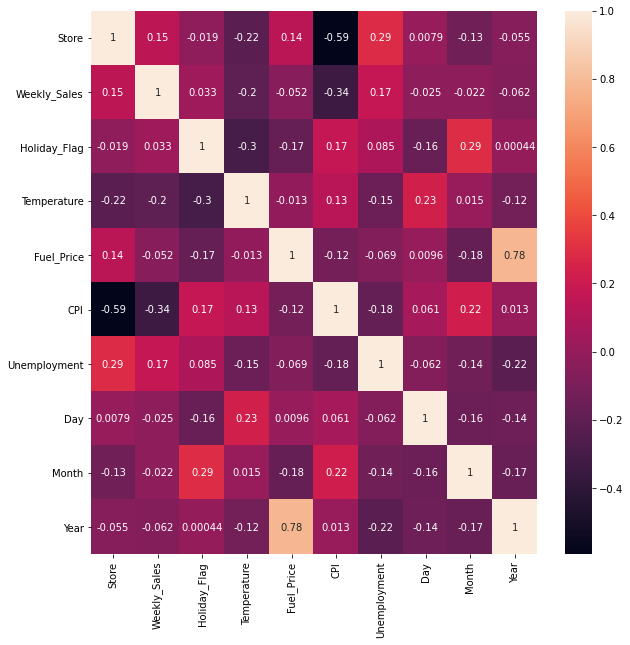

In [40]:
#Matrice de correlation
plt.subplots(figsize=(10,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [41]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,13.0,2011-03-25,1807545.43,0.0,42.380000,3.435,128.616064,7.47000,25,3,2011
4,6.0,2010-05-28,1644470.66,0.0,78.890000,2.759,212.412888,7.09200,28,5,2010
5,4.0,2010-05-28,1857533.70,0.0,59.645918,2.756,126.160226,7.89600,28,5,2010
6,15.0,2011-03-06,695396.19,0.0,69.800000,4.069,134.855161,7.65800,6,3,2011
7,20.0,2012-03-02,2203523.20,0.0,39.930000,3.617,213.023623,6.96100,2,3,2012
...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,2012-10-19,424513.08,0.0,73.440000,3.594,226.968844,6.03400,19,10,2012
145,14.0,2010-06-18,2248645.59,0.0,72.620000,2.780,182.442420,8.89900,18,6,2010
147,17.0,2010-11-06,845252.21,0.0,57.140000,2.841,126.111903,7.71999,6,11,2010
148,8.0,2011-12-08,856796.10,0.0,86.050000,3.638,219.007525,7.71999,8,12,2011


In [42]:
df =  df.sort_values(by=['Holiday_Flag'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435000,128.616064,7.470,25,3,2011
106,14.0,2010-02-26,2095591.63,0.0,34.89,3.308255,175.793196,8.992,26,2,2010
105,19.0,2010-07-30,1366395.96,0.0,72.83,2.932000,132.598387,8.099,30,7,2010
104,3.0,2012-06-22,419497.95,0.0,82.70,3.346000,225.306862,6.664,22,6,2012
103,4.0,2010-10-12,2302504.86,0.0,42.40,2.860000,126.793400,7.127,12,10,2010


## Vente moyenne suivant jour férié ou pas

In [56]:
cumul_per_Holiday_Flag = df['Weekly_Sales'].groupby(df['Holiday_Flag']).mean()
cumul_per_Holiday_Flag 

Holiday_Flag
0.0    1.258426e+06
1.0    1.347476e+06
Name: Weekly_Sales, dtype: float64

## Vente moyenne hebdomadaire

In [77]:
mean_per_Store = df['Weekly_Sales'].groupby(df['Store']).mean()
mean_per_Store.sort_values(ascending=False)

Store
4.0     2.195202e+06
14.0    2.119557e+06
13.0    1.997235e+06
2.0     1.982229e+06
20.0    1.941521e+06
10.0    1.854848e+06
11.0    1.757243e+06
6.0     1.559136e+06
1.0     1.554547e+06
19.0    1.400615e+06
18.0    1.151982e+06
8.0     8.887541e+05
17.0    8.415073e+05
15.0    6.422821e+05
7.0     5.211094e+05
16.0    5.153178e+05
9.0     5.145433e+05
3.0     4.033533e+05
5.0     2.943988e+05
Name: Weekly_Sales, dtype: float64

In [65]:
data1 = df[['Unemployment', 'Weekly_Sales', 'Date']]
data1

,Unemployment,Weekly_Sales,Date
1,7.470,1807545.43,2011-03-25
106,8.992,2095591.63,2010-02-26
105,8.099,1366395.96,2010-07-30
104,6.664,419497.95,2012-06-22
103,7.127,2302504.86,2010-10-12
...,...,...,...
114,7.564,1757242.51,2010-11-26
32,8.256,563460.77,2012-10-02
107,6.299,994801.40,2010-12-02
44,8.106,1641957.44,2010-12-02


In [66]:
data1 =  data1.sort_values(by=['Unemployment'])
data1.head()

,Unemployment,Weekly_Sales,Date
64,5.143,2771397.17,2011-12-16
63,5.422,313358.15,2012-10-19
25,5.527,919878.34,2012-12-10
132,5.644,2036231.39,2011-07-22
38,5.946,2008344.92,2011-06-24


In [67]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(data1[['Unemployment', 'Weekly_Sales']])
print(df_mean_norm)

     Unemployment  Weekly_Sales
64      -2.466044      2.205810
63      -2.164302     -1.392099
25      -2.050743     -0.504317
132     -1.924207      1.129724
38      -1.597590      1.088906
..            ...           ...
106      1.696696      1.216612
11       2.063329     -0.343687
70       2.063329      0.474264
66       2.075225     -0.143888
98       2.272061      0.737358

[104 rows x 2 columns]


In [71]:
df_mean_norm['Date'] = data1['Date']
df_mean_norm

,Unemployment,Weekly_Sales,Date
64,-2.466044,2.205810,2011-12-16
63,-2.164302,-1.392099,2012-10-19
25,-2.050743,-0.504317,2012-12-10
132,-1.924207,1.129724,2011-07-22
38,-1.597590,1.088906,2011-06-24
...,...,...,...
106,1.696696,1.216612,2010-02-26
11,2.063329,-0.343687,2010-10-15
70,2.063329,0.474264,2010-12-17
66,2.075225,-0.143888,2010-06-08


In [73]:
df_mean_norm =  df_mean_norm.sort_values(by=['Date'])
data1.head()

,Unemployment,Weekly_Sales,Date
64,5.143,2771397.17,2011-12-16
63,5.422,313358.15,2012-10-19
25,5.527,919878.34,2012-12-10
132,5.644,2036231.39,2011-07-22
38,5.946,2008344.92,2011-06-24


In [75]:
import plotly.express as px
fig = px.line(data_frame = df_mean_norm, 
              x = 'Date', 
              y= ['Weekly_Sales', 'Unemployment'], 
              title = 'Evolution des revenus hebdo et du chômage dans le temps')
fig.show(renderer = 'iframe')